In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
Comparison = pd.read_csv("Output Data/Comparison.csv")

In [3]:
ids_to_remove = Comparison.loc[Comparison["Distance"] >= 3.5, "ID (Dino)"].unique()
Comparison = Comparison[~Comparison["ID (Dino)"].isin(ids_to_remove)]
Comparison

,ID (Dino),ID (CME),x (Dino),y (Dino),z (Dino),x (CME),y (CME),z (CME),t,t_start (Dino),t_start (CME),FI (Dino),FI (CME),Track Length (Dino),Track Length (CME),Distance,Multi ID (CME),Multi Distance (CME)
1967,126.0,2391.0,315.67004,542.434300,11.342916,316.72,543.83,12.620,1.0,1.0,1.0,258.37274,208.820,10.0,10.0,2.163640,2391,2.16
1968,126.0,2391.0,316.31770,542.909060,11.968577,317.39,544.09,13.810,2.0,1.0,1.0,203.95332,246.850,10.0,10.0,2.436244,2391,2.44
1969,126.0,2391.0,316.03223,542.649700,12.360297,317.06,543.80,14.480,3.0,1.0,1.0,225.92268,190.540,10.0,10.0,2.621572,2391,2.62
1970,126.0,2391.0,315.77410,542.828740,12.761708,316.77,543.77,15.470,4.0,1.0,1.0,252.75209,176.230,10.0,10.0,3.035232,2391,3.04
1971,126.0,2391.0,316.43884,543.266000,12.557801,317.43,544.41,14.340,5.0,1.0,1.0,177.70338,218.840,10.0,10.0,2.338240,2391,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178229,37630.0,2593.0,652.26886,246.279390,130.447390,651.68,247.07,128.994,99.0,99.0,90.0,106.41963,81.637,1.0,10.0,1.756178,2593,1.76
178245,37646.0,4871.0,604.47990,105.113686,139.668910,603.03,105.64,142.128,99.0,99.0,96.0,124.40732,47.572,1.0,4.0,2.902816,4871,2.90
178246,37647.0,2595.0,590.73490,129.578340,138.973130,588.78,129.58,139.156,99.0,99.0,90.0,137.17221,182.650,1.0,10.0,1.963435,2595,1.96
178259,37660.0,3450.0,523.94183,655.460270,142.903550,522.38,655.80,143.774,99.0,99.0,93.0,220.19315,154.730,1.0,7.0,1.820003,3450,1.82


In [4]:
#a = Comparison[Comparison["Track Length (CME)"]==Comparison["Track Length (Dino)"] and Comparison["ID (CME)"]]
d = Comparison["ID (Dino)"].unique()


In [5]:
M_comp = Comparison.to_numpy()
ID_vec = defaultdict(list)

for ID in M_comp:
    ID_vec[ID[0]].append(ID)

for ID_val in ID_vec:
    ID_vec[ID_val] = np.array(ID_vec[ID_val]) 

ID_list = np.zeros((len(ID_vec),5), dtype=object)

In [6]:
for i, ID in enumerate(ID_vec):
    ID_val = ID_vec[ID]
    CME_ID = np.unique(ID_val[:,0])
    Dino_IDs = np.unique(ID_val[:,1])
    TL_CME = np.unique(ID_val[:,13])
    TL_Dino = np.unique(ID_val[:,14])

    ID_list[i][0] = CME_ID
    ID_list[i][1] = Dino_IDs
    ID_list[i][2] = TL_CME
    ID_list[i][3] = TL_Dino
    
    if len(Dino_IDs) == 1 and TL_CME == TL_Dino:
        ID_list[i][4] = True
    else:
        ID_list[i][4] = False

In [7]:
Sum = pd.DataFrame(ID_list, columns = ["ID (Dino)","ID (CME)", "Track Length (Dino)", "Track Length (CME)", "True Match"])
Sum.to_csv("Output Data/Sum.csv")

In [8]:
track_lengths = np.array([row[2][0] for row in ID_list])
mask_true = np.array([row[4] for row in ID_list])
bins = np.arange(0, 110, 10)

counts, _ = np.histogram(track_lengths, bins)

counts_true, _ = np.histogram(track_lengths[mask_true], bins)

labels = np.array(("0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"))

/var/folders/_q/vc97fgzd3lx8bgdsjyrsdxr00000gn/T/ipykernel_60254/2277902411.py:1: RuntimeWarning: invalid value encountered in divide
  plt.bar(labels,100*counts_true/counts)


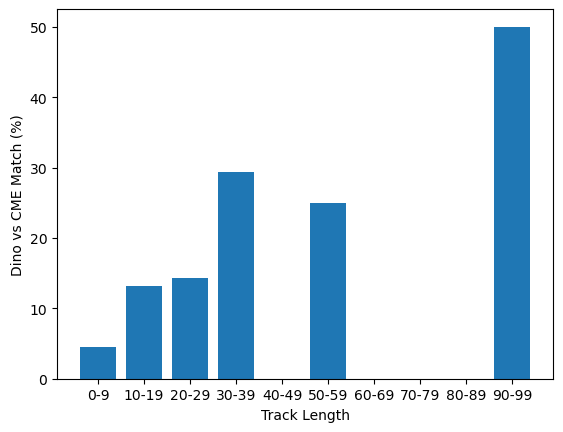

In [9]:
plt.bar(labels,100*counts_true/counts)
plt.xlabel("Track Length")
plt.ylabel("Dino vs CME Match (%)")
plt.show()

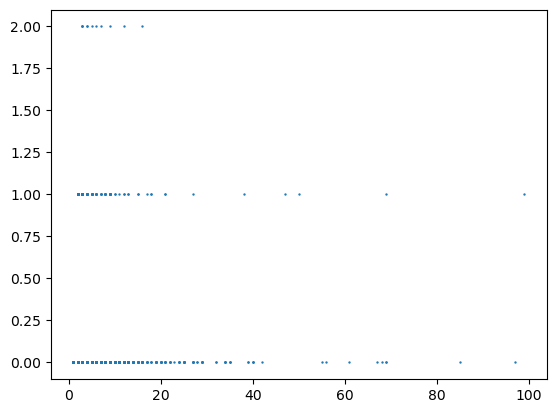

In [10]:
selected = ID_list[ID_list[:, 4] == False]
breaks = np.array([len(x) for x in selected[:,1]])-1
plt.scatter(selected[:,2],breaks, s = 0.5)
plt.show()

